#### Linear Regression with Single Variable

Linear regression is the first of the supervised learning models we will learn. Linear regression models are used to make predictions based on data. The basic assumption these models makes is that past predict the future.  
Regression means finding relationships between variables.It helps us to understand how changes in one or more independent variables affect the depedent variable.By adding the term linear, we are stating the assumption that the relationship we are interested to find out is a linear one.  
Let's create a dummy dataset on which we will use for this discussion.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

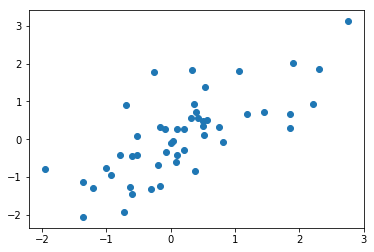

In [190]:
np.random.seed(12)
num_observations = 50
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
plt.figure(figsize=(6,4))
plt.scatter(x1[:, 0],x1[:, 1])

##### correlation
The first thing one should do before applying linear regression is to check the assumption that the relationship between the primary and predictive variable is infact linear. One of the methods to check that is to calculate correlation.Correlation is a statistical measure of linearity and indicates how two variables relate to one another. The correlation between any two variable can be between -1 and 1, 1 means perfect correlation, 0 means no correlation (independence) and -1 indicates perfectly inverse correlation.

In [192]:
def covariance(variable_1, variable_2, bias=0):       
    observations = float(len(variable_1))      
    return np.sum((variable_1 - np.mean(variable_1)) * \
                  (variable_2 - np.mean(variable_2)))/(observations-min(bias,1))  

def standardize(variable):      
    return (variable - np.mean(variable)) / np.std(variable)  

def correlation(var1,var2,bias=0):      
    return covariance(standardize(var1), standardize(var2),bias)

print(correlation(x1[:, 0],x1[:, 1]))

0.734452691065


The above code was just for reference, numpy has a built-in method to calculate correlation:

In [193]:
print(np.corrcoef((x1[:, 0],(x1[:, 1]))))

[[ 1.          0.73445269]
 [ 0.73445269  1.        ]]


Correlation of 0.73 is shows strong linear dependency and hence linear regression can be applied for making predictions.       
  
The variable that we want to predict is called a **target** variable. Conventionally, it is represented by y . On the other hand, the variables which are used to make the predictions are called predictive variables/features/attributes/dimensions. As a collection, they are denoted by **X**. Mathematically, **X** is a matrix called as feature matrix in which features are represented as columns.  

In supervised learning, we want to find a function h, that when applied to **X** produces y, or
$$ y= h(X)$$
The function h is called as an hypothesis function.  
In case of linear regression, we try to fit a straight line through a given set of points.So for linear regression, our hypothesis function becomes:  
$$ y = \beta_0+\beta X$$
Now in order to make predictions, we want to find the line which fits the data. But you can see that there are multiple ways to draw the line.

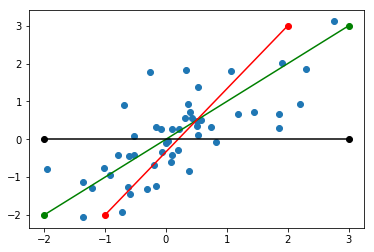

In [191]:
np.random.seed(12)
num_observations = 50
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
plt.figure(figsize=(6,4))
plt.scatter(x1[:, 0],x1[:, 1])
plt.plot([-2, 3], [-2, 3], marker = 'o', color="green")
plt.plot([-1, 2], [-2, 3], marker = 'o', color="red")
plt.plot([-2, 3], [0, 0], marker = 'o', color="black")

Now we will almost never be able to find a function which when applied to **X** produces y exactly. The hypothesis function will always be an approximation.  
So how do we measure how good an approximation our model is. We define another function which measures the accuracy in predictions on the training dataset. This function is called as a cost function.

One of the popular and simple cost function is Root Mean Square Error (RMSE).It takes an average difference of all the results of the hypothesis with inputs from x's and the actual output y's.
$$ J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2 $$

Having identified our cost function, our next goal is to find a line which **minimizes** the cost function,i.e. which minimizes the error in predictions.

The most popular algorithms to do the optimization (minimization) in case of RMSE, is **gradient descent**. It is an iterative algorithm that will tries to move values of cofficients in a direction which minimizes the loss in each iteration.

$$ \begin{align*} \text{repeat until convergence: } \lbrace & \newline \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*} $$

It is important to note that it's possible that the values derived from gradient descent are not the optimal ones, or even that the algorithm never converges. Optimization problems can get stuck into local minima.

In [176]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta[0][1])+theta[0][0]
        loss = (hypothesis).transpose() - y.transpose()
        cost = np.sum(loss) / (m)
        if i%1000==0:
            print("Iteration %d | Cost: %f" % (i, cost))
        gradient = np.dot(xTrans, loss.transpose()) / m
        theta0 = theta[0][0] - alpha * cost
        theta1 = theta[0][1] - alpha * gradient
        theta = np.array([[theta0,theta1]])
    return theta

Iteration 0 | Cost: 1.094101
Iteration 1000 | Cost: 0.007889
Iteration 2000 | Cost: 0.000107
Iteration 3000 | Cost: 0.000002
Iteration 4000 | Cost: 0.000000
Iteration 5000 | Cost: 0.000000
Iteration 6000 | Cost: 0.000000
Iteration 7000 | Cost: 0.000000
Iteration 8000 | Cost: 0.000000
Iteration 9000 | Cost: 0.000000
[[-0.05432944  0.79343788]]


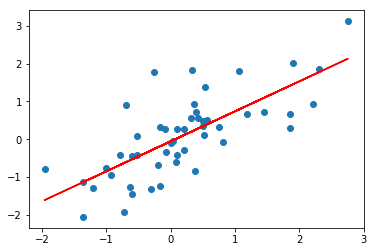

In [194]:
numIterations= 10000
alpha = 0.005
theta =  np.array([[1,1]])
X = np.array(x1[:, 0]).reshape(num_observations,1)
y = np.array(x1[:, 1]).reshape(num_observations,1)
theta = gradientDescent(X, x1[:, 1], theta, alpha, num_observations, numIterations)
print(theta)
plt.scatter(x1[:, 0],x1[:, 1])
plt.plot(X, X*theta[0][1] + theta[0][0], 'r')

#### Making predictions
Now that we have our equation of line, we can use that to make predictions about any input values.

In [196]:
#General equation of line:
#y=theta[0][1]*x+theta[0][0]
y_10  = theta[0][1]*10+theta[0][0]
print(y_10)

7.88004940235


Once we got the intution behind the linear regression, we will start to use machine learning libraries which are going to do most of the heavy lifting for us. One of the most popular machine learning libraries in python is sklearn. Let's use it's api to do the same regression and check if we get the same results.

In [178]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


Coefficients: 
 [[ 0.79343788]]
Intercept: 
 [-0.05432944]


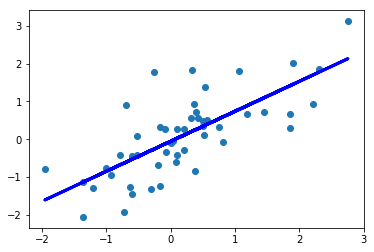

In [179]:
plt.figure(figsize=(6,4))
plt.scatter(x1[:, 0],x1[:, 1])
plt.plot(X, regr.predict(X), color='blue', linewidth=3)

#### Parameters and Hyper-parameters

What we set out to do above is finding the coefficient and intercept for the linear equation. The attributes we are trying to derive from a system are called parameters, in above case it's the coefficient and the intercept.  
However, inorder to search for the best fitting parameters, we used the gradient descent algorithm which has it's own set of parameters which influces the effectiveness. The parameter in GD was the learning rate (alpha). Such parameters, which are not the properties of the model itself, but has influence over them are called hyper-parameters.